* House price prediction is a classic machine learning problem that showcases regression skills,
useful for companies involved in real estate and market analytics.
It beneficial but is often seen as a basic project.

# 1.understand the data

# data collection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('housing_price_dataset.csv')
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


# data description

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


* The Dataset contains 6 columns where `Price` is the Target column and others are our Feature columns.
There are no null values in the dataset.

In [9]:
df.columns

Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')

In [10]:
df.shape

(50000, 6)

*here 50000 rows and 6 columns

In [12]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [13]:
df.tail()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957
49999,1572,5,3,Rural,2011,221618.583218


# 2.data cleaning

# handling missing values

In [16]:
df.isnull()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
49995,False,False,False,False,False,False
49996,False,False,False,False,False,False
49997,False,False,False,False,False,False
49998,False,False,False,False,False,False


In [17]:
df.notnull()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
49995,True,True,True,True,True,True
49996,True,True,True,True,True,True
49997,True,True,True,True,True,True
49998,True,True,True,True,True,True


In [18]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

*We observed that there are `-ve` price values in the Dataframe that are most likely outliers.remove that outliers

In [20]:
# Calculate the mean of the column
mean_value = df['Price'].mean()

# Calculate the standard deviation of the column
std_value = df['Price'].std()

# Condition for outliers (within 3 standard deviations from the mean)
condition = (df['Price'] - mean_value).abs() <= 3 * std_value

# Filter the DataFrame to remove outliers
df[condition].shape

(49965, 6)

# remove duplicates

In [22]:
df.duplicated().sum()

0

In [23]:
df.T.duplicated().sum()

0

# 3.univariant analysis

# summary statistics

In [26]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


* The dataset contains a negative price value like -36,588 . this are the outliers on dataset.
 price : it is almost normal skew because mean and 50% values are almost same.

2. ***Square Feet:***
  * The Sqaue feet ranges from 1000 to 2999 which means more of our houses are medium sized.

In [28]:
df.describe(include='object')

,Neighborhood
count,50000
unique,3
top,Suburb
freq,16721


# distribution plot

In [30]:
numeric_features=df.select_dtypes(exclude=object)
numeric_features

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065
...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895
49996,2854,2,2,1988,374507.656727
49997,2979,5,3,1962,384110.555590
49998,2596,5,2,1984,380512.685957


In [31]:
categorical_feature=df.select_dtypes(include=object)

In [32]:
cat_dummies= pd.get_dummies(categorical_feature,dtype=int)

In [33]:
# Concat numerical columns with categorical dummies 
df = pd.concat((numeric_features, cat_dummies), axis=1)

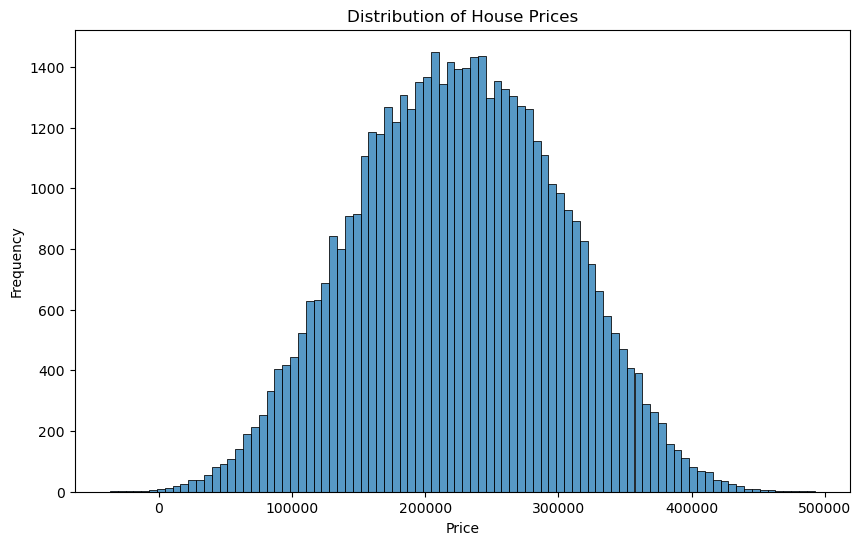

In [34]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.histplot(df['Price'])
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

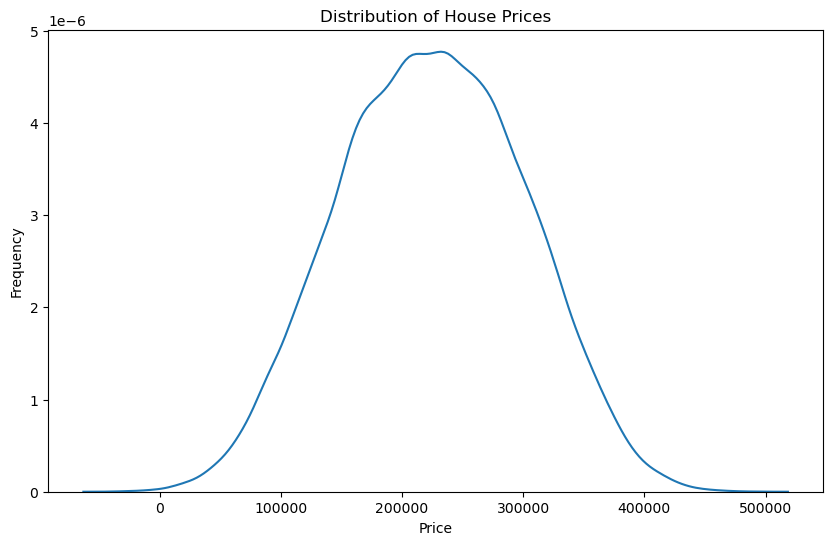

In [35]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.kdeplot(df['Price'])
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

* here we identify it is left or right or normal skews that tells the outliers basically.

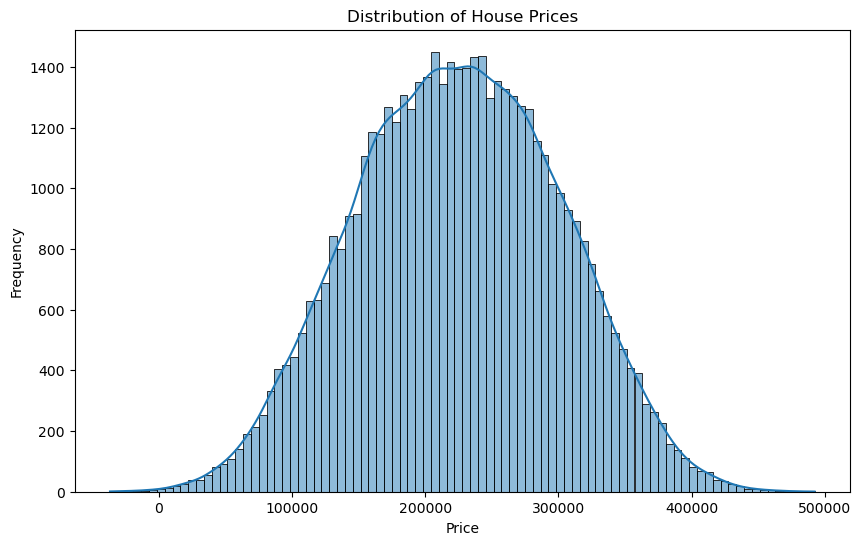

In [37]:
plt.figure(figsize=(10, 6))  #  Analyzing the output variable
sns.histplot(df['Price'],kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

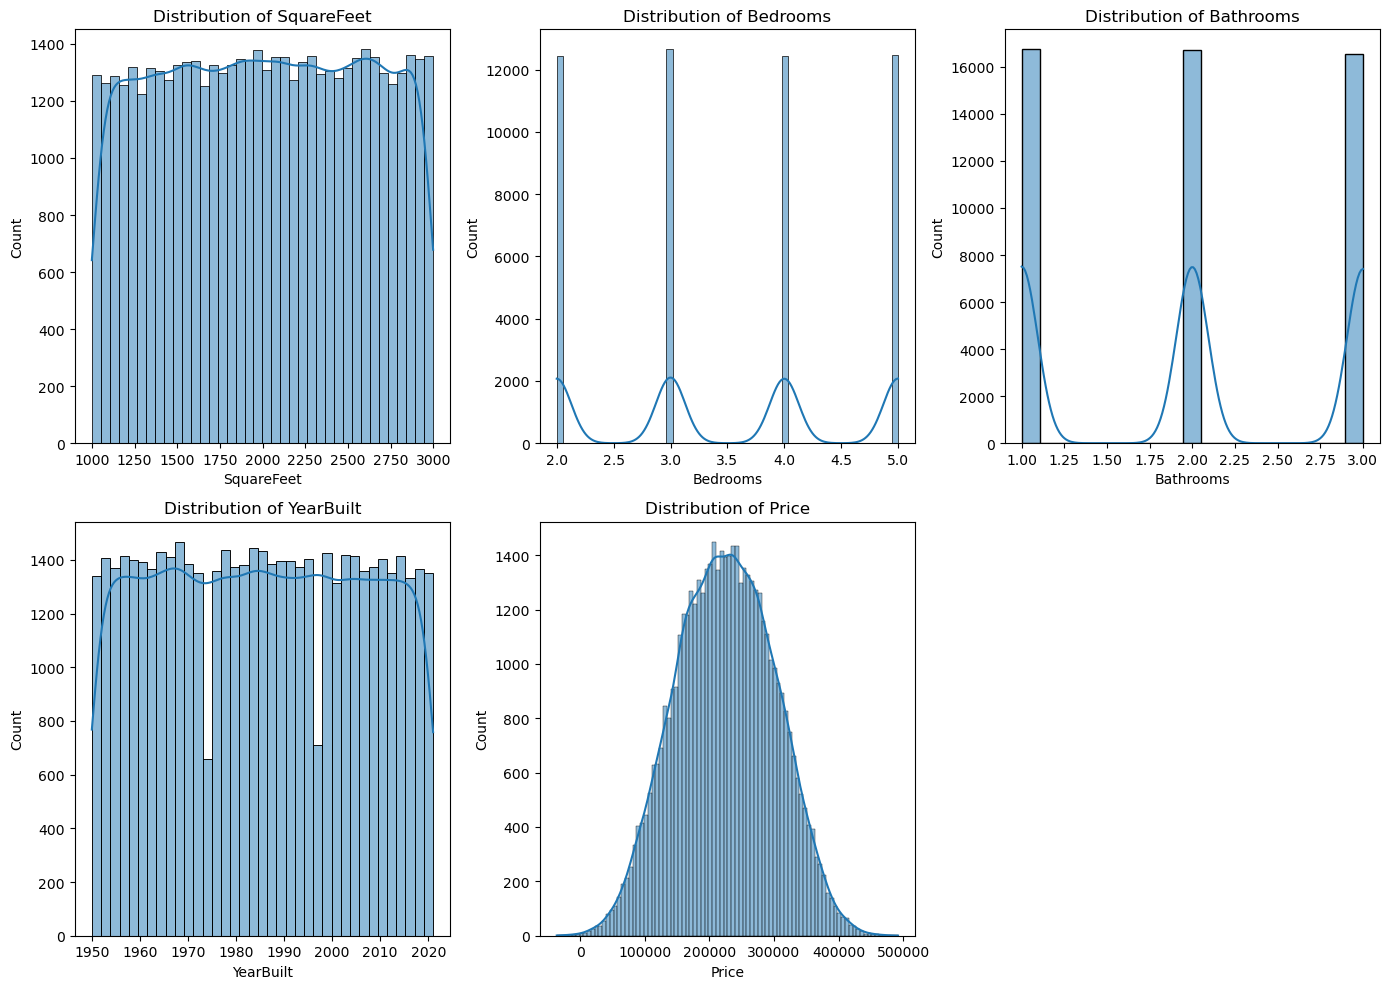

In [38]:
numerical_columns = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'Price']

plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns for the subplots
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

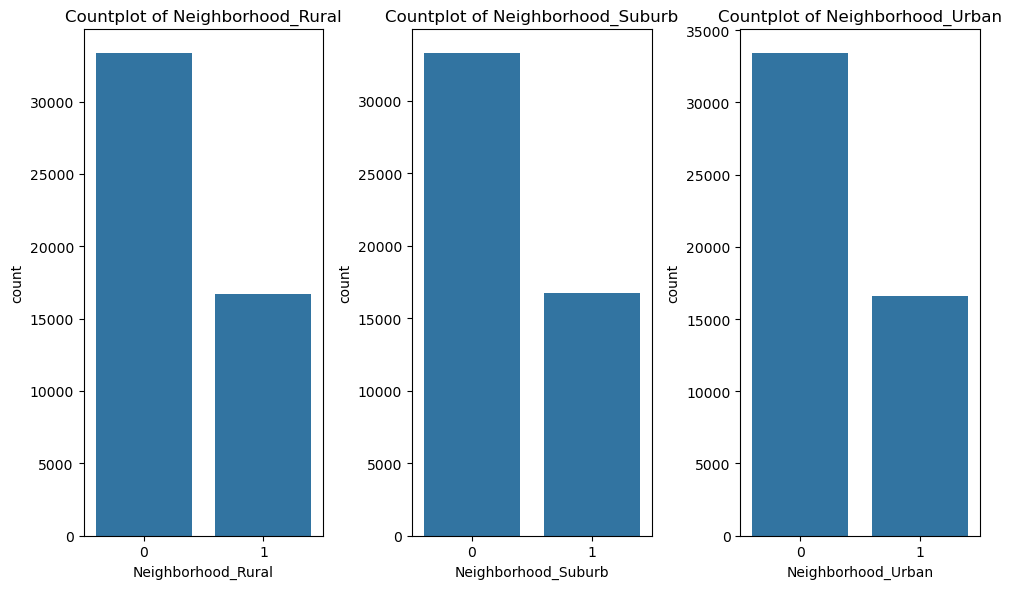

In [39]:
categorical_columns = ['Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']

plt.figure(figsize=(10, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns for the subplots
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
    plt.tight_layout()
plt.show()

# 4.bivariant analysis

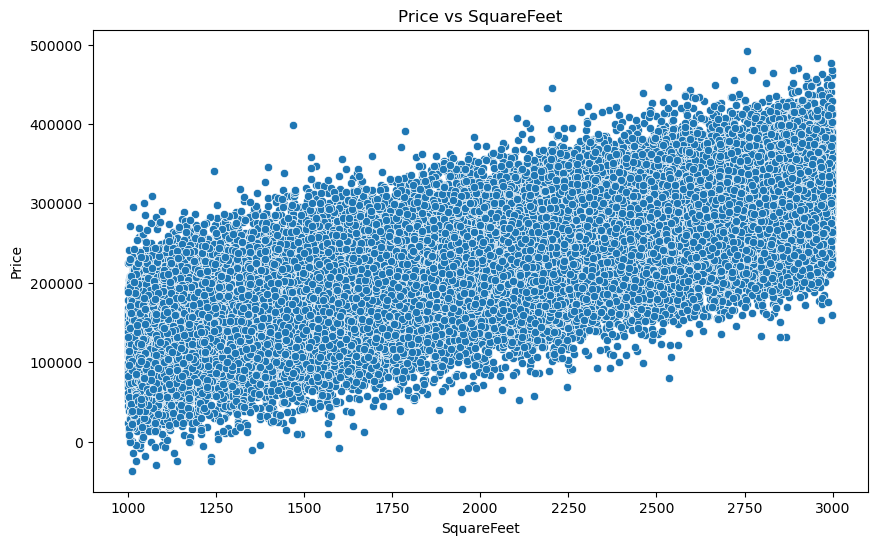

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['SquareFeet'], y=df['Price'])
plt.title('Price vs SquareFeet')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.show()

 * here 'SquareFeet' increases the `Price` also Increases (postitive co-relation)

# multivariate analysis

# correlation

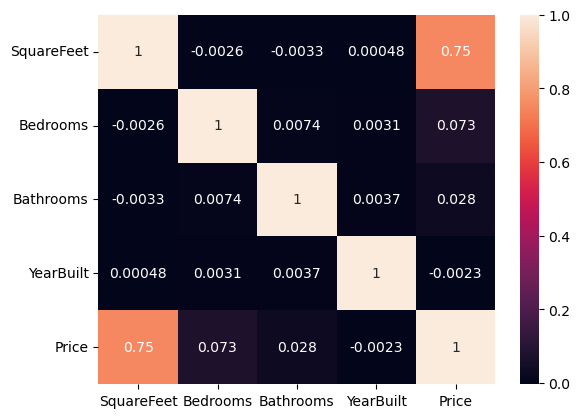

In [45]:
ct=sns.heatmap(numeric_features.corr(),annot=True)

* SquareFeet has higher co-relation with price

<Axes: xlabel='Bathrooms', ylabel='Price'>

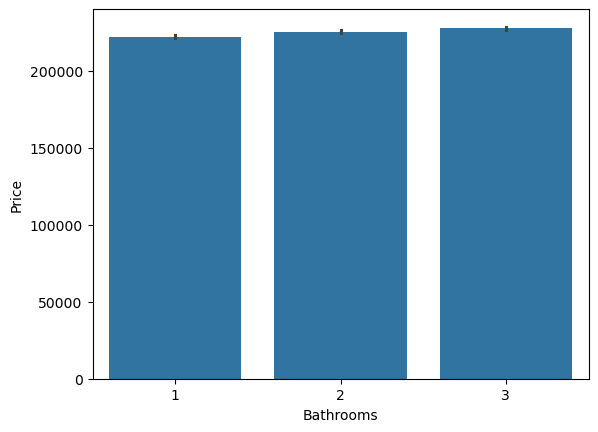

In [47]:
sns.barplot(data=df,x="Bathrooms",y="Price")

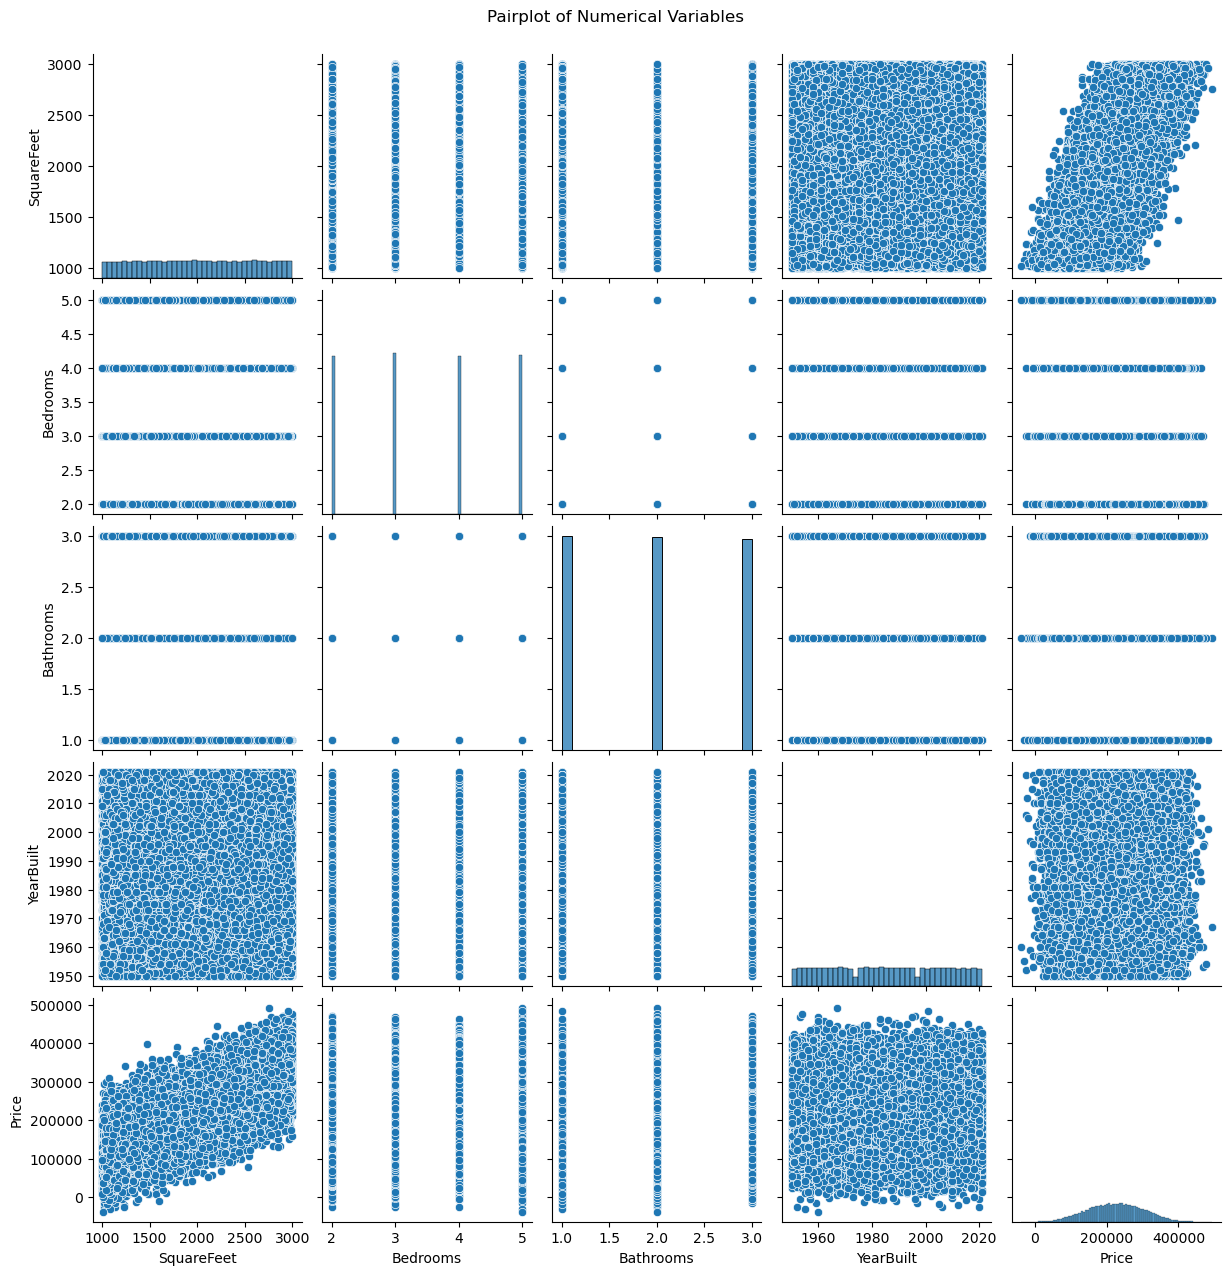

In [48]:
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# 6.identifying outliers

Text(0.5, 1.0, 'Price')

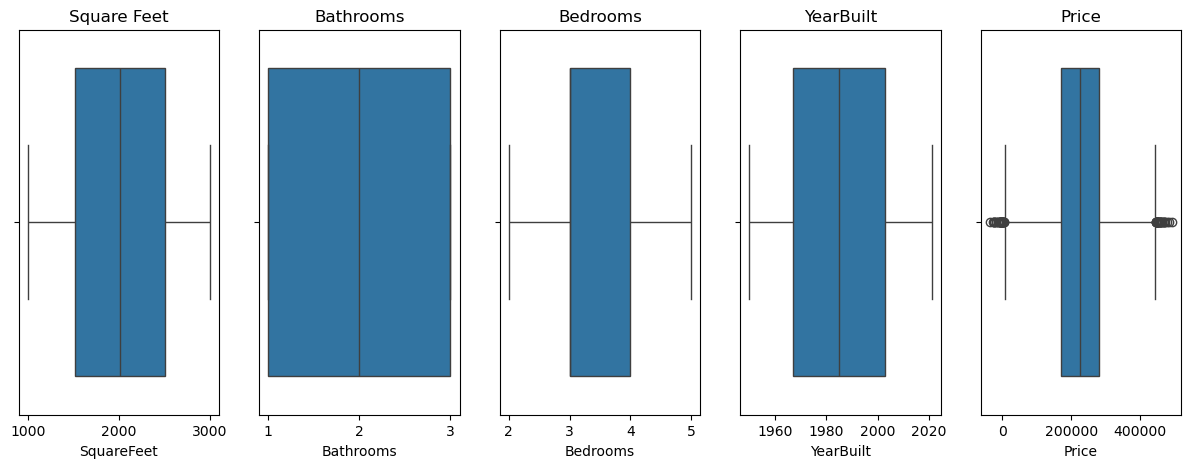

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot each boxplot on a separate subplot
sns.boxplot(x=df['SquareFeet'], ax=axes[0])
axes[0].set_title('Square Feet')

sns.boxplot(x=df['Bathrooms'], ax=axes[1])
axes[1].set_title('Bathrooms')

sns.boxplot(x=df['Bedrooms'], ax=axes[2])
axes[2].set_title('Bedrooms')
sns.boxplot(x=df['YearBuilt'], ax=axes[3])
axes[3].set_title('YearBuilt')
sns.boxplot(x=df['Price'], ax=axes[4])
axes[4].set_title('Price')

In [51]:
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
    display(outliers)

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
1266,1024,2,2,2006,-24715.242482,0,0,1
2310,1036,4,1,1983,-7550.504574,0,1,0
2845,2999,5,2,1999,461502.014630,0,0,1
3285,2985,5,1,1961,456959.804367,1,0,0
3357,2928,3,3,1962,457902.675442,0,1,0
3630,1235,3,2,2012,-19871.251146,1,0,0
3784,2901,2,3,1996,470989.679074,0,0,1
3967,2931,5,1,1983,453551.125469,1,0,0
4162,1352,5,2,1977,-10608.359522,0,1,0
4537,1102,2,1,1967,5796.058628,0,1,0


Text(0.5, 1.0, 'Price')

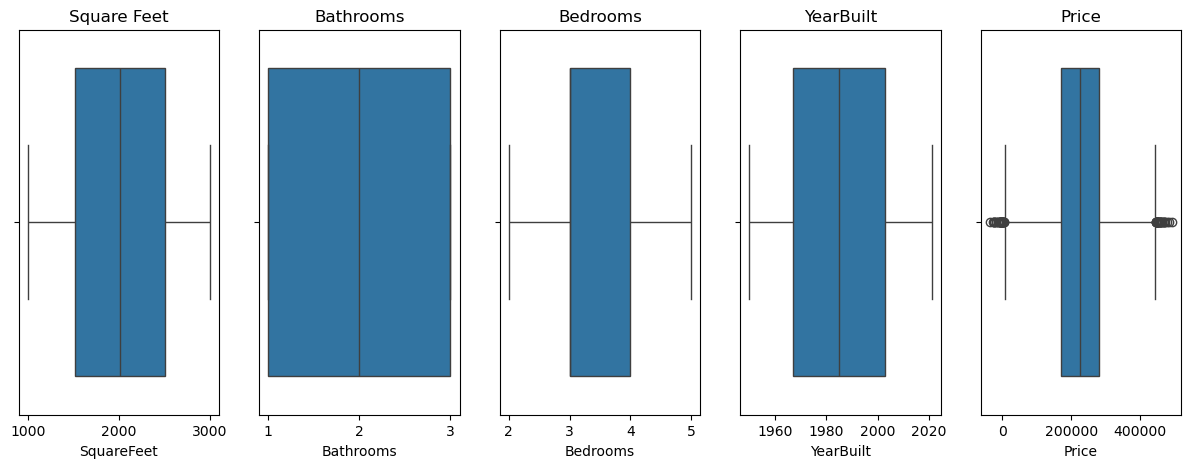

In [52]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Plot each boxplot on a separate subplot
sns.boxplot(x=df['SquareFeet'], ax=axes[0])
axes[0].set_title('Square Feet')

sns.boxplot(x=df['Bathrooms'], ax=axes[1])
axes[1].set_title('Bathrooms')

sns.boxplot(x=df['Bedrooms'], ax=axes[2])
axes[2].set_title('Bedrooms')
sns.boxplot(x=df['YearBuilt'], ax=axes[3])
axes[3].set_title('YearBuilt')
sns.boxplot(x=df['Price'], ax=axes[4])
axes[4].set_title('Price')

# Machine learning model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [55]:
df1 = pd.DataFrame(df)

In [56]:
df1

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0
...,...,...,...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895,1,0,0
49996,2854,2,2,1988,374507.656727,0,1,0
49997,2979,5,3,1962,384110.555590,0,1,0
49998,2596,5,2,1984,380512.685957,1,0,0


In [57]:
# Features (X) and Target (y)
X = df.drop('Price', axis=1)
y = df['Price']

In [58]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(X_test.shape)

(40000, 7)
(10000, 7)
(40000,)
(10000, 7)


In [59]:
# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [60]:
# Predictions
y_pred = model.predict(X_test)

In [61]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
# Output Results
print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("R² Score:",r2)
print("Root Mean Square Error:",rmse)



Mean Absolute Error (MAE): 39430.16533829791
Mean Squared Error (MSE): 2436249371.3072467
R² Score: 0.5755628630306235
Root Mean Square Error: 49358.376911191546


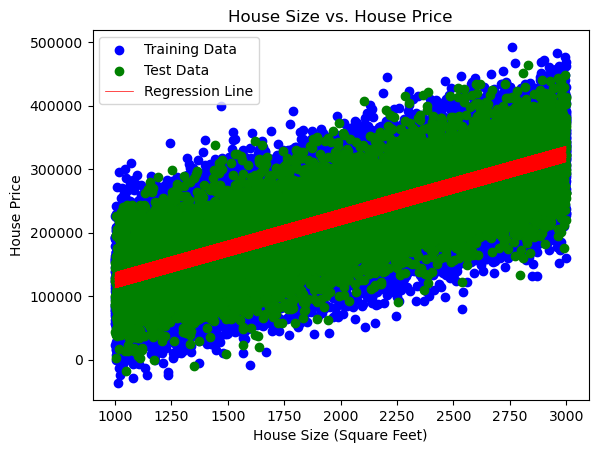

In [62]:
# Scatter plot for training and test data
plt.scatter(X_train['SquareFeet'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['SquareFeet'], y_test, color='green', label='Test Data')

# Regression line
plt.plot(X['SquareFeet'], model.predict(X), color='red', linewidth=0.5, label='Regression Line')

# Labels and title
plt.xlabel('House Size (Square Feet)')
plt.ylabel('House Price')
plt.title('House Size vs. House Price')
plt.legend()
plt.show()

* here this scatter plot of linear regression model is not better.it looks like a complex to understand
so, we have to check another regression models and identify best model that esay to understand

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of models
models = {
    "Multilinear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Polynomial Regression (Degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polynomial Regression (Degree 3)": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

# Loop through models
for name, model in models.items():
    # Model training
    model.fit(X_train, y_train)
    
    # Model testing
    y_pred = model.predict(X_test)
    
    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}: MSE={mse:.2f}, R^2={r2:.2f}")


Multilinear Regression: MSE=2436249371.31, R^2=0.58
Ridge Regression: MSE=2436249120.16, R^2=0.58
Lasso Regression: MSE=2436248618.42, R^2=0.58
Decision Tree: MSE=5236460997.19, R^2=0.09
Random Forest: MSE=2758207093.23, R^2=0.52


* here we identify the least error model that model is best model to the dataset.
 multilinear regression and ridge regressions are the best models

# optional

In [ ]:
X_test.iloc[[0]] # get the first row

In [ ]:
# Getting the original index of the first row in X_test
original_index = X_test.index[0]

# Accessing the original row from df
original_row = df.loc[original_index]

print(f'Original Row: \n{original_row}')

In [ ]:
# pass first row in the model predict method
model.predict(X_test.iloc[[0]])